# Marketing Campaign Effectiveness - Data Analysis & Dashboard
## Overview
In today's competitive business world, understanding customer demographics and behaviors is crucial for successful marketing campaigns. This project analyzes a marketing dataset containing customer details like income, education, marital status, and country to evaluate campaign effectiveness.

We will:
Clean & preprocess data to remove inconsistencies.

Perform exploratory data analysis (EDA) to uncover trends.

Visualize insights using Python & interactive dashboards.

Build KPIs to measure campaign success.

In [2]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scipy openpyxl plotly

#### Step 1: Data Loading and Inspection

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/sowja/Desktop/Data Analysis Projects/Marketing Campaign Effectiveness/marketing_data.csv"
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())

      ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

#### Step 2: Data Cleaning and Preprocessing

In [6]:
# Clean the 'Income' column (remove '$' and ',' and convert to numeric)
data['Income'] = data['Income'].replace(r'[\$,]', '', regex=True).astype(float)

# Handle missing values by filling 'Income' NaNs with median or any other preferred method
data['Income'] = data['Income'].fillna(data['Income'].median())

# Drop rows with missing values in 'ID' if needed (this may not be necessary since 'ID' should be unique)
data = data.dropna(subset=['ID'])

# Check for duplicates and drop them
data = data.drop_duplicates()

# Confirm the cleaning steps
print(f"Missing Values After Cleaning:\n{data.isnull().sum()}\n")
print(f"Dataset Info After Cleaning:\n{data.info()}\n")
print(f"Duplicate Rows in the Dataset: {data.duplicated().sum()}\n")

Missing Values After Cleaning:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64 

#### Step 3: Exploratory Data Analysis (EDA)

In [8]:
# 1. Summary statistics of numerical data
print("Summary statistics of numerical data:")
print(data.describe())

Summary statistics of numerical data:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min     

In [9]:
# 2. Categorical data distribution
print("\nCategorical data distribution:")
print(data['Education'].value_counts())
print(data['Marital_Status'].value_counts())
print(data['Country'].value_counts())


Categorical data distribution:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64
Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64


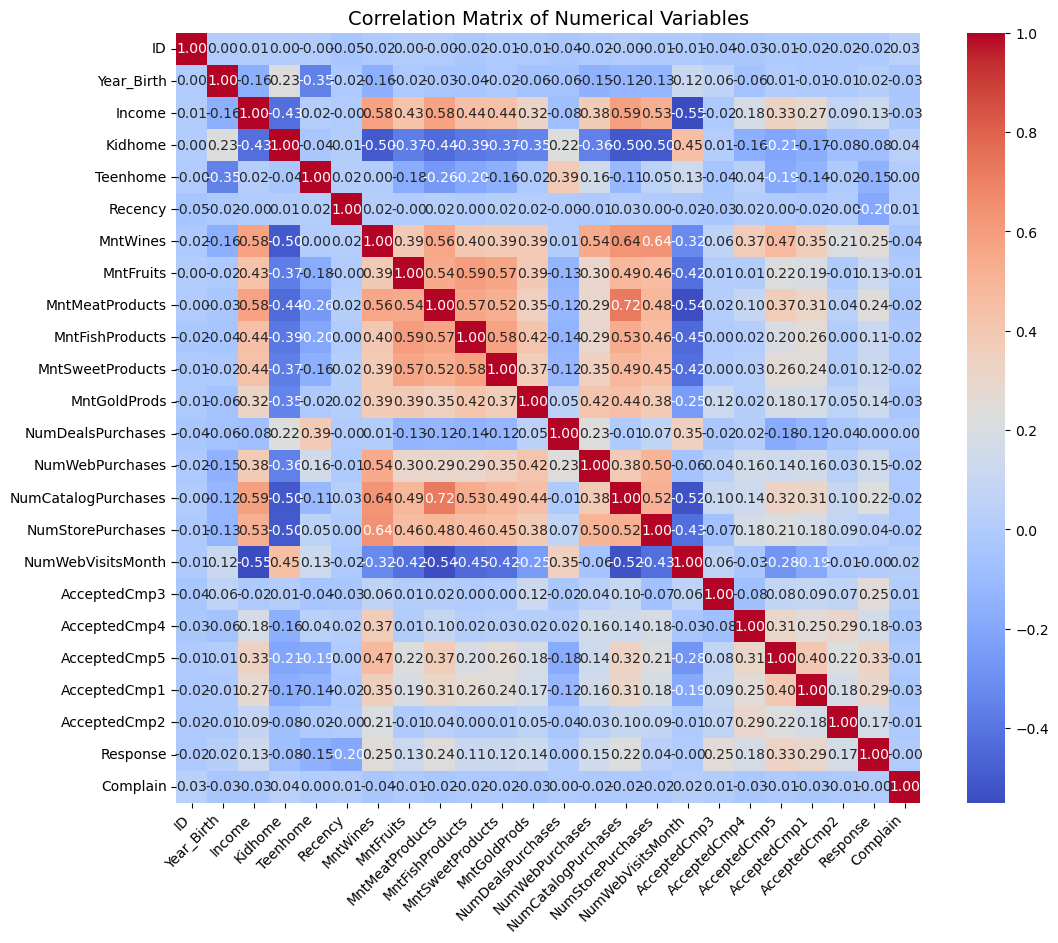

In [10]:
# 3. Correlation matrix of numerical variables
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Variables', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()


#### Step 4: Data Visualization

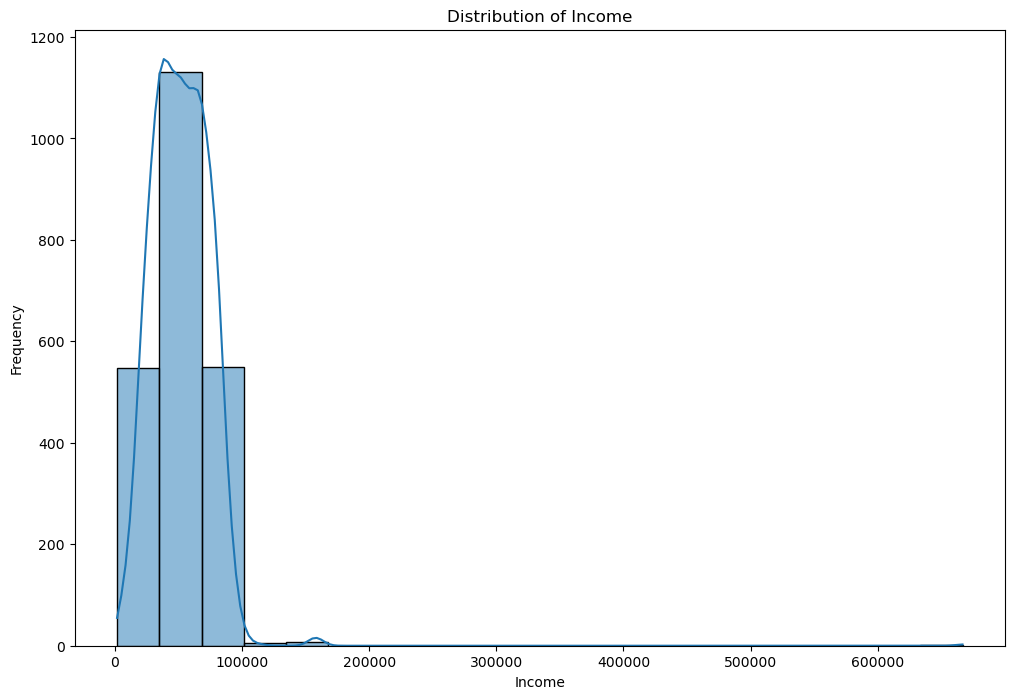

In [12]:
# Income distribution (after cleaning)
plt.figure(figsize=(12, 8))
sns.histplot(data['Income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

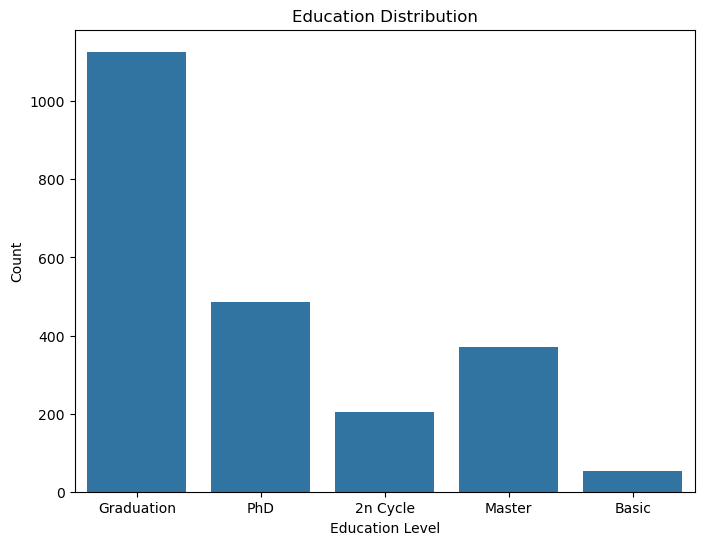

In [13]:
# Bar plot for Education
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data)
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

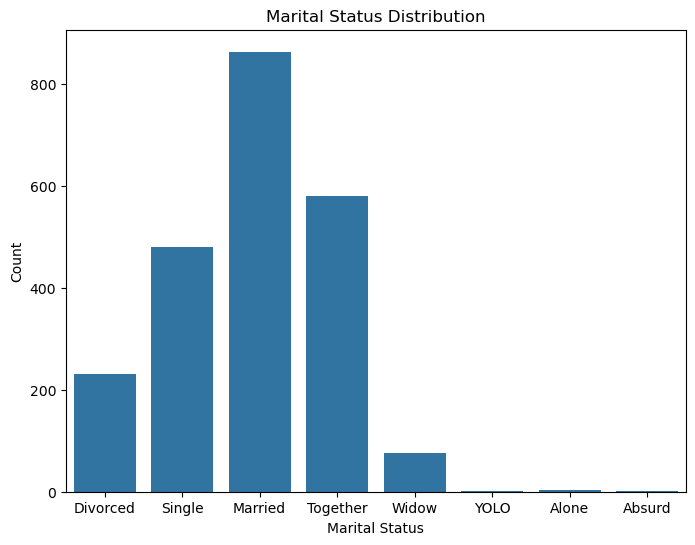

In [14]:
# Bar plot for Marital_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=data)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

#### 5. Save the cleaned dataset

In [16]:

# Save to the specified path
output_path = "C:/Users/sowja/Desktop/Data Analysis Projects/Marketing Campaign Effectiveness/cleaned_marketing_data.csv"
data.to_csv(output_path, index=False)

print(f"Cleaned data saved at: {output_path}")

Cleaned data saved at: C:/Users/sowja/Desktop/Data Analysis Projects/Marketing Campaign Effectiveness/cleaned_marketing_data.csv


## Marketing Campaign Effectiveness Dashboard

This Marketing Campaign Effectiveness Dashboard helps businesses analyze customer data to improve marketing strategies. It provides insights into customer distribution, income levels, education, and marital status using interactive visualizations.

In [32]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Load cleaned data
file_path = "C:/Users/sowja/Desktop/Data Analysis Projects/Marketing Campaign Effectiveness/cleaned_marketing_data.csv"
data = pd.read_csv(file_path)

# Fix country names for the map visualization
country_mapping = {
    "SP": "Spain",
    "CA": "Canada",
    "US": "United States",
    "AUS": "Australia",
    "GER": "Germany",
    "IND": "India",
    "SA": "South Africa",
    "ME": "United Arab Emirates"
}
data["Country"] = data["Country"].replace(country_mapping)

# Ensure 'Income' is numeric
data["Income"] = pd.to_numeric(data["Income"], errors="coerce")
data.loc[:, 'Income'] = data['Income'].fillna(data['Income'].median())


# Normalize Income to Range 0 - 100K
min_income = data["Income"].min()
max_income = data["Income"].max()
data["Income_Scaled"] = ((data["Income"] - min_income) / (max_income - min_income)) * 100000

# Initialize Dash App
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Marketing Campaign Effectiveness Dashboard", style={'textAlign': 'center'}),

    # Dropdown for Country Selection
    html.Div([
        html.Label("Select Country:", style={'fontSize': '18px'}),
        dcc.Dropdown(
            id="country-dropdown",
            options=[{"label": country, "value": country} for country in data["Country"].unique()],
            value=None,
            placeholder="Select a country to filter",
            clearable=True
        )
    ], style={'width': '40%', 'margin': 'auto', 'textAlign': 'center'}),

    # KPI Section (Dynamic)
    html.Div([
        html.Div([
            html.H3("Total Customers"),
            html.P(id="total-customers", style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={'width': '25%', 'textAlign': 'center'}),

        html.Div([
            html.H3("Avg. Scaled Income ($0 - $100K)"),
            html.P(id="average-income", style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={'width': '25%', 'textAlign': 'center'}),

        html.Div([
            html.H3("Most Common Education"),
            html.P(id="common-education", style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={'width': '25%', 'textAlign': 'center'}),

        html.Div([
            html.H3("Most Common Marital Status"),
            html.P(id="common-marital", style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={'width': '25%', 'textAlign': 'center'}),
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'marginBottom': '30px'}),

    # Income Distribution (Histogram)
    dcc.Graph(id="income-distribution"),

    # Education Distribution
    dcc.Graph(id="education-distribution"),

    # Marital Status Distribution
    dcc.Graph(id="marital-status-distribution"),

    # Country-wise Customer Distribution (Map)
    dcc.Graph(id="customer-map"),
])


# Callback to update KPIs & Graphs dynamically based on selected country
@app.callback(
    [
        Output("total-customers", "children"),
        Output("average-income", "children"),
        Output("common-education", "children"),
        Output("common-marital", "children"),
        Output("income-distribution", "figure"),
        Output("education-distribution", "figure"),
        Output("marital-status-distribution", "figure"),
        Output("customer-map", "figure"),
    ],
    [Input("country-dropdown", "value")]
)
def update_dashboard(selected_country):
    # Filter data based on country selection
    if selected_country:
        filtered_data = data[data["Country"] == selected_country]
    else:
        filtered_data = data

    # Dynamic KPIs
    total_customers = len(filtered_data)
    average_income = filtered_data["Income_Scaled"].mean()
    most_common_education = filtered_data["Education"].mode()[0] if not filtered_data.empty else "N/A"
    most_common_marital = filtered_data["Marital_Status"].mode()[0] if not filtered_data.empty else "N/A"

    # Income Distribution (Histogram)
    income_fig = px.histogram(
        filtered_data, x="Income_Scaled", nbins=20, title="Income Distribution (Scaled 0 - 100K)",
        color_discrete_sequence=['skyblue']
    )

    # Education Distribution
    education_fig = px.bar(
        filtered_data, x="Education", title="Education Distribution",
        color_discrete_sequence=['purple']
    )

    # Marital Status Distribution
    marital_fig = px.bar(
        filtered_data, x="Marital_Status", title="Marital Status Distribution",
        color_discrete_sequence=['orange']
    )

    # Country-wise Customer Distribution (Map)
    customer_map_fig = px.choropleth(
        filtered_data,
        locations="Country",
        locationmode="country names",
        color="Income_Scaled",
        hover_name="Country",
        hover_data={"Income_Scaled": True, "Education": True, "Marital_Status": True},
        color_continuous_scale="Blues",
        title="Customer Distribution by Country (Scaled Income 0 - 100K)"
    )

    return (
        f"{total_customers:,}",  # Format total customers with commas
        f"${average_income:,.2f}",  # Format income with commas and 2 decimal places
        most_common_education,
        most_common_marital,
        income_fig,
        education_fig,
        marital_fig,
        customer_map_fig
    )


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


## Conclusion
The dashboard reveals key trends in customer demographics and financial behavior. It helps businesses identify high-value customers, target the right audience, and optimize marketing campaigns. With dynamic KPIs and interactive filters, it enables better decision-making for improved campaign performance.